# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [375]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### loading

In [376]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### inspect

**Check the shape of your data**

In [377]:
#your code here
spaceship.shape

(8693, 14)

**Check for data types**

In [378]:
#your code here
spaceship.dtypes
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### clean

**Check for missing values**

In [379]:
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [380]:
#your code here
spaceship.duplicated().sum()

0

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [381]:
#your code here
df_spaceship_cleaned = spaceship.dropna()
df_spaceship_cleaned

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### transform

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [382]:
cabin_u = df_spaceship_cleaned['Cabin'].unique()
cabin_n = df_spaceship_cleaned['Cabin'].nunique()

cabin_u, cabin_n

(array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
       dtype=object),
 5305)

In [383]:
dest_u = df_spaceship_cleaned['Destination'].unique()
dest_n = df_spaceship_cleaned['Destination'].nunique()

dest_u, dest_n

(array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object), 3)

In [384]:
home_u = df_spaceship_cleaned['HomePlanet'].unique()
home_n = df_spaceship_cleaned['HomePlanet'].nunique()

home_u, home_n

(array(['Europa', 'Earth', 'Mars'], dtype=object), 3)

In [385]:
#your code here 
# get first value from column cabin
df_spaceship_cleaned['Cabin'] = df_spaceship_cleaned['Cabin'].apply(lambda x: str(x)[0])
display(df_spaceship_cleaned)

C:\Users\rk-admin\AppData\Local\Temp\ipykernel_28940\3671353265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spaceship_cleaned['Cabin'] = df_spaceship_cleaned['Cabin'].apply(lambda x: str(x)[0])


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


- Drop PassengerId and Name

In [386]:
#your code here
df_spaceship_reduced = df_spaceship_cleaned.drop(columns=['PassengerId', 'Name'])
df_spaceship_reduced

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [387]:
# transforming true/false bool into 1/0 integer for 3 columns
df_spaceship_reduced['Transported'] = df_spaceship_reduced['Transported'].astype(int)
df_spaceship_reduced['CryoSleep'] = df_spaceship_reduced['CryoSleep'].astype(int)
df_spaceship_reduced['VIP'] = df_spaceship_reduced['VIP'].astype(int)

display(df_spaceship_reduced)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,A,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,F,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,A,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,1,G,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,0,G,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,0,E,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


- For non-numerical columns, do dummies.

In [388]:
df_space_numerical =  df_spaceship_reduced.select_dtypes(include=['number'])
display(df_space_numerical)

df_space_categorical = df_spaceship_reduced.select_dtypes(include=['object', 'category'])
display(df_space_categorical)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


,HomePlanet,Cabin,Destination
0,Europa,B,TRAPPIST-1e
1,Earth,F,TRAPPIST-1e
2,Europa,A,TRAPPIST-1e
3,Europa,A,TRAPPIST-1e
4,Earth,F,TRAPPIST-1e
...,...,...,...
8688,Europa,A,55 Cancri e
8689,Earth,G,PSO J318.5-22
8690,Earth,G,TRAPPIST-1e
8691,Europa,E,55 Cancri e


In [389]:
#your code here // dummy data for the categorical values
df_cat_dummy = pd.get_dummies(df_space_categorical, columns=['Cabin', 'HomePlanet', 'Destination'])
df_cat_dummy = df_cat_dummy.applymap(lambda x: int(x) if isinstance(x, (bool, int)) else x)
df_cat_dummy

C:\Users\rk-admin\AppData\Local\Temp\ipykernel_28940\1696568017.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cat_dummy = df_cat_dummy.applymap(lambda x: int(x) if isinstance(x, (bool, int)) else x)


,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,0,0,0,0,0,1,0,1,0,0
8689,0,0,0,0,0,0,1,0,1,0,0,0,1,0
8690,0,0,0,0,0,0,1,0,1,0,0,0,0,1
8691,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [390]:
df_spaceship_model = pd.get_dummies(df_spaceship_reduced, columns=['Cabin', 'HomePlanet', 'Destination'])
df_spaceship_model

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_A,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,False,...,False,False,False,False,False,True,False,False,False,True
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,False,...,False,True,False,False,True,False,False,False,False,True
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,True,...,False,False,False,False,False,True,False,False,False,True
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,True,...,False,False,False,False,False,True,False,False,False,True
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,False,...,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,True,...,False,False,False,False,False,True,False,True,False,False
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,False,...,False,False,True,False,True,False,False,False,True,False
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,False,...,False,False,True,False,True,False,False,False,False,True
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,False,...,True,False,False,False,False,True,False,True,False,False


In [391]:
df_spaceship_model = df_spaceship_model.applymap(lambda x: int(x) if isinstance(x, (bool, int)) else x)
df_spaceship_model

C:\Users\rk-admin\AppData\Local\Temp\ipykernel_28940\140002847.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_spaceship_model = df_spaceship_model.applymap(lambda x: int(x) if isinstance(x, (bool, int)) else x)


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_A,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,1,...,0,0,0,0,0,1,0,1,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,0,1,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0,...,0,0,1,0,1,0,0,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,...,1,0,0,0,0,1,0,1,0,0


### train & test

**Perform Train Test Split**

In [392]:
#your code here
features = df_spaceship_model.drop(columns = ["Transported"])
target = df_spaceship_model["Transported"]

In [393]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [394]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [395]:
normalizer = MinMaxScaler()

In [396]:
normalizer.fit(X_train)

MinMaxScaler()

In [397]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [398]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)

In [399]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

### Model - Classifier // Target -> "Transported" finite

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [400]:
#your code here
knn = KNeighborsClassifier (n_neighbors=10)

In [401]:
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=10)

- Evaluate your model's performance. Comment it

In [402]:
#your code here
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
pred = knn.predict(X_test_norm)

print(f'R2 core:', knn.score(X_test_norm, y_test))
print(f'RMSE:', root_mean_squared_error(y_test, pred))
print(f'MAE:', mean_absolute_error(y_test, pred))

R2 core: 0.75642965204236
RMSE: 0.493528467221132
MAE: 0.24357034795763993


- Result compared without normalizer form the intro lab there is no uge impact on the score // even a little decrease

### Feature Selection

In [403]:
## corr = np.abs(df.corr()) # works without method
corr = np.abs(df_spaceship_model.corr(method="spearman")) ## # spearman / pearson? method="spearman"
corr

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_A,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
CryoSleep,1.000000,0.090870,0.082303,0.521965,0.534120,0.519757,0.554971,0.534122,0.462803,0.036496,...,0.110388,0.227553,0.259884,0.012855,0.107303,0.097172,0.027704,0.063681,0.093287,0.115603
Age,0.090870,1.000000,0.108511,0.132855,0.206145,0.112964,0.208032,0.183614,0.081202,0.095315,...,0.030795,0.036424,0.231921,0.017246,0.236871,0.250315,0.022719,0.025402,0.035443,0.000090
VIP,0.082303,0.108511,1.000000,0.045791,0.124013,0.033229,0.093526,0.104755,0.042260,0.145633,...,0.008838,0.070532,0.103469,0.002759,0.171725,0.155231,0.044640,0.044215,0.000931,0.038647
RoomService,0.521965,0.132855,0.045791,1.000000,0.175702,0.442219,0.253528,0.176385,0.363412,0.039666,...,0.098334,0.240691,0.224718,0.012297,0.033908,0.209185,0.266274,0.082808,0.051335,0.106001
FoodCourt,0.534120,0.206145,0.124013,0.175702,1.000000,0.184632,0.478645,0.510008,0.176724,0.141633,...,0.014811,0.009649,0.237707,0.031047,0.069993,0.285131,0.219968,0.058634,0.069808,0.007812
ShoppingMall,0.519757,0.112964,0.033229,0.442219,0.184632,1.000000,0.256929,0.197898,0.225309,0.051604,...,0.100583,0.230443,0.201018,0.000272,0.014319,0.194956,0.191665,0.081483,0.033670,0.093636
Spa,0.554971,0.208032,0.093526,0.253528,0.478645,0.256929,1.000000,0.434082,0.370353,0.108252,...,0.037576,0.041344,0.234405,0.023859,0.066951,0.176359,0.106946,0.017390,0.075317,0.032278
VRDeck,0.534122,0.183614,0.104755,0.176385,0.510008,0.197898,0.434082,1.000000,0.344015,0.115966,...,0.021131,0.034548,0.225785,0.022539,0.012459,0.208773,0.208785,0.033800,0.058136,0.006832
Transported,0.462803,0.081202,0.042260,0.363412,0.176724,0.225309,0.370353,0.344015,1.000000,0.005651,...,0.098427,0.094847,0.022711,0.000126,0.168845,0.182004,0.012357,0.123783,0.001281,0.110655
Cabin_A,0.036496,0.095315,0.145633,0.039666,0.141633,0.051604,0.108252,0.115966,0.005651,1.000000,...,0.061076,0.125019,0.117371,0.003130,0.194797,0.308842,0.091873,0.091068,0.052092,0.047815


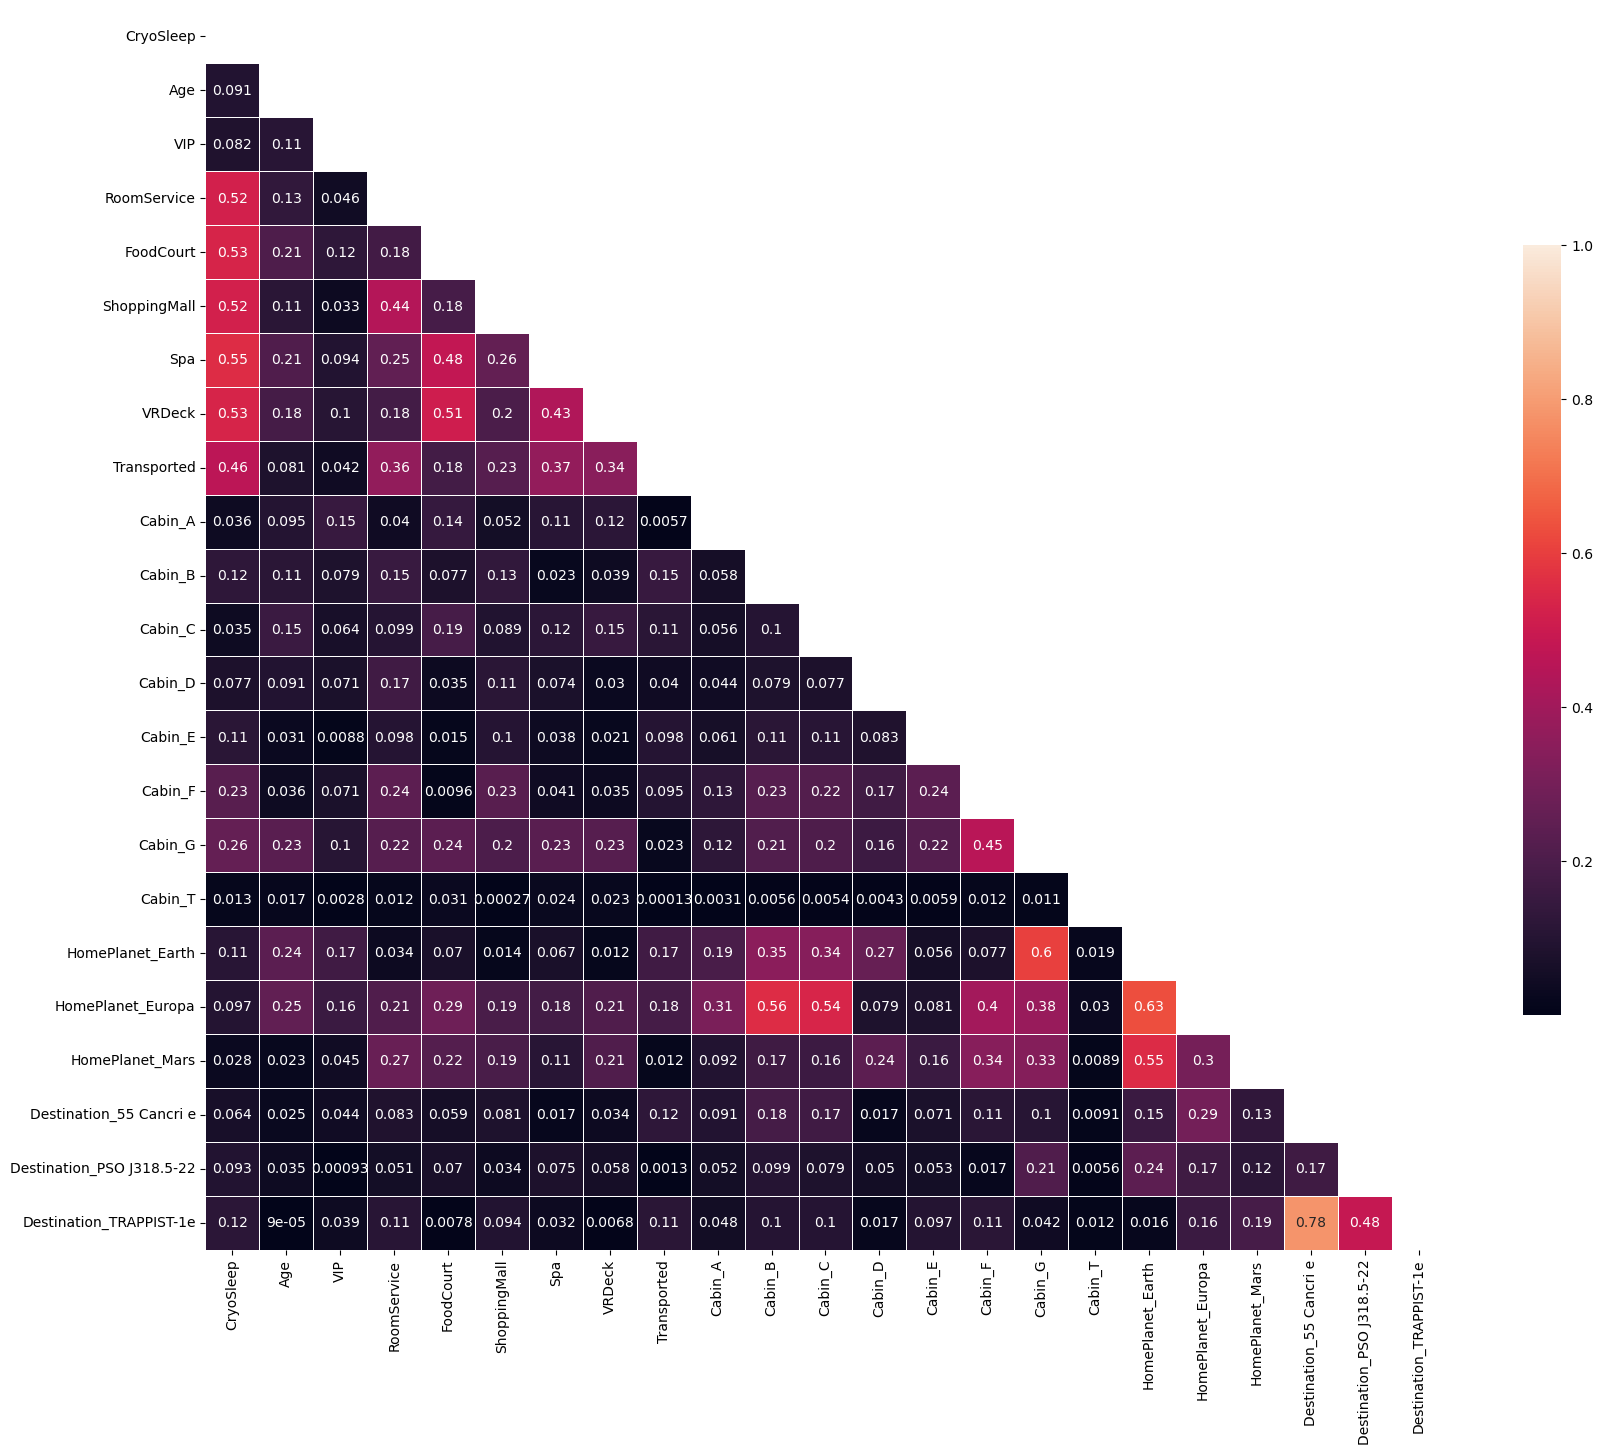

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [405]:
#your code here
X_train_reduced = X_train_norm.drop(columns = ["VIP", "Cabin_A", "Cabin_B", "Cabin_C", "Cabin_D", "Cabin_E", "Cabin_F", "Cabin_G", "Cabin_T", "Destination_55 Cancri e", "Destination_PSO J318.5-22", ])
X_test_reduced = X_test_norm.drop(columns = ["VIP", "Cabin_A", "Cabin_B", "Cabin_C", "Cabin_D", "Cabin_E", "Cabin_F", "Cabin_G", "Cabin_T", "Destination_55 Cancri e", "Destination_PSO J318.5-22"])

In [406]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_reduced, y_train)

KNeighborsClassifier(n_neighbors=10)

In [407]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
pred = knn.predict(X_test_reduced)

print(f'R2 core:', knn.score(X_test_reduced, y_test))
print(f'RMSE:', root_mean_squared_error(y_test, pred))
print(f'MAE:', mean_absolute_error(y_test, pred))

R2 core: 0.7708018154311649
RMSE: 0.47874647212155524
MAE: 0.2291981845688351


- with feature selection , the score increases a bit but still no uge impact on the score in comparison with the the easy way // even a little decrease